# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [10]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
from itertools import product
from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [16]:
from cs231n.features import color_histogram_hsv, hog_feature

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
    
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    y_train = y_train.reshape(y_train.shape[0],1)
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]
    
    return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [5]:
from cs231n.features import *

num_color_bins = 10 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

In [39]:
X_train_feats = np.reshape(X_train_feats, (X_train_feats.shape[0], -1))



## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [46]:
# Use the validation set to tune the learning rate and regularization strength

from cs231n.classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9, 1e-8, 1e-7]
regularization_strengths = [5e4, 5e5, 5e6]

results = {}
best_val = -1
best_svm = None
results = {}
pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr_rate, reg   in product(learning_rates, regularization_strengths):
    model_svm = LinearSVM()
    model_svm.train(X_train_feats, y_train,learning_rate=lr_rate, reg=reg, num_iters=1500, verbose=False)
    train_accuracy = np.mean(y_train == model_svm.predict(X_train_feats))
    valid_accuracy = np.mean(y_val == model_svm.predict(X_val_feats))
    if valid_accuracy > best_val:
        best_val = valid_accuracy
        best_svm = model_svm
    results[(lr_rate, reg)] = (train_accuracy, valid_accuracy)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

89.1234261561
89.1036571262
89.1034066556
89.0938399752
89.0961043058
89.0730686396
89.0796854493
89.0799688474
89.0490572088
89.033905738
89.0355163533
89.0324056133
89.0233907691
89.0165949382
89.0166256018
89.0034840072
88.9864908235
88.9852845522
88.9700566432
88.9598539233
88.9532334828
88.9658716404
88.9352176311
88.9338207683
88.9298923018
88.9359174189
88.9067450477
88.9050970707
88.9230141063
88.8745197703
88.8738381097
88.870951018
88.8712241273
88.8582743698
88.8516895563
88.8346804627
88.8309150875
88.823690792
88.8211146413
88.814513811
88.7969134084
88.7978633133
88.7760801741
88.7787655074
88.7638894293
88.7579873778
88.7702182041
88.7409179579
88.7422183199
88.7294715705
88.7219084808
88.6962043941
88.6920318456
88.6883999159
88.6842512192
88.6941407835
88.6657808279
88.6657630415
88.659684058
88.6484312205
88.6574319263
88.630260413
88.6357737856
88.6069494068
88.6044365393
88.6117553916
88.5973019832
88.592121037
88.5797031563
88.5620963803
88.5733395071
88.5652728818

82.8957197587
82.8948903026
82.9057428462
82.8851325704
82.8804220843
82.8764365773
82.8709691697
82.8536118278
82.8464038922
82.8259514456
82.8205777974
82.8334694466
82.8245969373
82.8184776561
82.803093134
82.7830963963
82.7845205416
82.7986247774
82.7861525866
82.7672820142
82.7446997333
82.7567619232
82.7405068659
82.7396382684
82.7348839584
82.7335814334
82.713549109
82.7045535467
82.7085983997
82.702959828
82.693753263
82.6759761218
82.6705679539
82.6706286093
82.6669352792
82.6581287032
82.6697204409
82.6334422473
82.6217923682
82.6291318265
82.6202425507
82.602573618
82.6015090019
82.5925945168
82.5847594093
82.5812540762
82.5765586637
82.5643136233
82.556008075
82.5618594665
82.5309745847
82.5458640754
82.5260284634
82.5261500591
82.5121644859
82.5026748429
82.5045308841
82.4925089707
82.4897207483
82.4491451783
82.4757222202
82.4545393708
82.4442075219
82.4340439943
82.4324135109
82.4360187738
82.4187337897
82.4105973794
82.4063670126
82.3955344781
82.3921373639
82.400771027

788.592693604
787.807034954
787.022212777
786.255737886
785.484274705
784.70253013
783.934133982
783.156225303
782.381340712
781.610636369
780.831691802
780.077652796
779.29380005
778.528728229
777.730398469
776.972567473
776.205102789
775.454805745
774.689570086
773.913224475
773.151039184
772.38580773
771.612484509
770.865757249
770.096198903
769.348690684
768.580212984
767.82205008
767.058472895
766.302180979
765.537892819
764.798522594
764.047462852
763.272708931
762.530345612
761.765096938
761.019327954
760.26203155
759.51328585
758.772148511
758.007904912
757.269822334
756.520595418
755.772502938
755.022943514
754.293911664
753.527191487
752.791072093
752.048274077
751.289141201
750.549658468
749.816786226
749.10045324
748.33886206
747.600082272
746.867011554
746.12698495
745.384713372
744.648864697
743.913186938
743.19015113
742.450464872
741.716393955
740.980427336
740.249287766
739.507247698
738.793540256
738.055914528
737.328232966
736.610086287
735.876050797
735.144961944
73

359.223856505
358.879397986
358.533475017
358.175761497
357.824253337
357.4722519
357.128812178
356.77838546
356.43397912
356.092164635
355.734372093
355.393913731
355.041374701
354.692330666
354.367105897
354.012203711
353.669524463
353.32367789
352.980803337
352.633881893
352.285868542
351.95507875
351.613426556
351.259720914
350.913716722
350.575956723
350.225567972
349.888366867
349.549777461
349.225697925
348.880956609
348.529757819
348.193881471
347.856267507
347.509927
347.176377865
346.844619958
346.494917112
346.162474122
345.822041282
345.489639931
345.151885283
344.816209271
344.48290265
344.146202531
343.80602274
343.47258463
343.141576589
342.802501924
342.473008571
342.142104943
341.80349248
341.475427258
341.139209292
340.804177524
340.481521584
340.154495418
339.816987273
339.488848072
339.162441983
338.836487568
338.505177152
338.1682669
337.831460748
337.511820964
337.182365027
336.857062755
336.523701924
336.206626706
335.867201495
335.542650181
335.212661616
334.889

191.072435875
190.887564734
190.709917956
190.536355834
190.344806004
190.165288008
189.974735216
189.80215738
189.619872387
189.439697441
189.254677992
189.080580225
188.90096018
188.722967638
188.542136656
188.366621982
188.184396737
188.005577252
187.825391187
187.643718718
187.466290696
187.287463496
187.110555797
186.932341177
186.756076543
186.580991624
186.406584205
186.228469387
186.050577579
185.877967154
185.693833286
185.51164472
185.341765958
185.159644116
184.983007872
184.805255946
184.639077149
184.45690626
184.286566584
184.108109672
183.934226244
183.758595724
183.5827653
183.41261117
183.235494249
183.060012118
7734.6747586
7657.61009238
7581.31527412
7505.78253308
7431.01506433
7356.96569181
7283.68630023
7211.09955059
7139.25502667
7068.15161269
6997.73234389
6928.01756303
6858.99087493
6790.68742822
6723.02149374
6656.04675875
6589.75403854
6524.10252803
6459.11007156
6394.77408233
6331.07910104
6268.01858154
6205.58300168
6143.7749922
6082.5855219
6021.98983555
59

23.8301088368
23.6824718613
23.5351204749
23.3907930558
23.2465670034
23.1053559554
22.9647080859
22.8252256879
22.6866866872
22.5499314601
22.4151626687
22.2820773297
22.1485710579
22.0174197582
21.8880787889
21.7602354973
21.6325912327
21.5054936355
21.3815950281
21.2582362487
21.1355531861
21.0144862717
20.8947793272
20.7760109734
20.6588116284
20.5425830495
20.4277269068
20.3133252212
20.2003679456
20.0888495628
19.9778170586
19.8683112179
19.7600588583
19.6524889314
19.5465823367
19.4413476184
19.3370066811
19.2337954751
19.1321890536
19.0312049687
18.9309523189
18.8316249543
18.7337165956
18.6370074074
18.5407787746
18.4447073429
18.3513681651
18.2578241707
18.165679964
18.0741682541
17.9841633885
17.894440453
17.805249424
17.7171394364
17.6308834916
17.5443683293
17.4590160212
17.3747072016
17.291426882
17.2083805974
17.126724319
17.0456046827
16.9651695289
16.8859166303
16.8076367077
16.7295177416
16.6519015709
16.5759011297
16.5002249346
16.4254740703
16.3515862305
16.27825862

9.00372092438
9.00369254469
9.00365158104
9.00360671746
9.00356856965
9.00353586336
9.00350928262
9.00347091143
9.00343736002
9.00340595486
9.00336851454
9.00332748306
9.00329165467
9.00326534747
9.00323756826
9.00319560113
9.00316537331
9.00313430473
9.00311596061
9.00307614472
9.00303814836
9.00301609054
9.00298470721
9.00295002015
9.00292679905
9.00289697574
9.00287205632
9.00283901662
9.00280824478
9.00277855504
9.0027575463
9.00272486003
9.00270470254
9.00267971043
9.00265154696
9.002625531
9.00259914295
9.00256817163
9.00253952151
9.00252012167
9.00248941868
9.00246403121
9.00244397957
9.00241811095
9.0023955445
9.00236548536
9.00234632009
9.0023223284
9.0022918259
86.0119713641
85.9320615207
85.8506799314
85.7682168008
85.6970590381
85.6274818225
85.548215214
85.4521349742
85.3932859366
85.311902846
85.2445247988
85.1626611947
85.063828807
84.9958345674
84.9365888599
84.8514246059
84.783061393
84.7182065657
84.6285442557
84.5588170777
84.4797251528
84.400707318
84.3202772883
84.

45.5104329069
45.4728062957
45.4458575711
45.404128198
45.3662275876
45.3246302273
45.3008656502
45.2573550616
45.2221122052
45.1854887509
45.1538766624
45.1047806167
45.0775380247
45.0378975999
45.007864797
44.9717899953
44.9289553023
44.8886339688
44.860012352
44.822302693
44.7809341928
44.7598429788
44.7141868458
44.6792079737
44.6389800638
44.6125398293
44.5671823078
44.5329047104
44.4936036556
44.4645153983
44.4277938188
44.3962615611
44.371883418
44.3270632306
44.2853744956
44.2500266177
44.2149878814
44.1812332805
44.1522562464
44.1167309191
44.0766806648
44.0475308704
44.0004201783
43.9721769623
43.9294090703
43.9087925205
43.8684298559
43.8429859213
43.7907586016
43.7673868669
43.7195909306
43.6901259519
43.6624652478
43.6174381412
43.5901751546
43.5659802522
43.5122903135
43.4925705887
43.4599677584
43.4201233824
43.3832565206
43.3496433527
43.318897107
43.2782005238
43.2472498818
43.2132041106
43.1807679594
43.1350508171
43.1063108541
43.0741874054
43.0335253769
43.009899175

26.8386639468
26.8171454638
26.8030370295
26.7863453831
26.7676519729
26.7522882631
26.728902233
26.7125894913
26.690630407
26.6775367095
26.6610563514
26.6421652194
26.6295837495
26.6023267004
26.5942201228
26.5704500584
26.5635639252
26.5422856481
26.523715603
26.5032959837
26.4833439714
26.4644862266
26.448537084
26.4282717271
26.4233427412
26.3985161563
26.3778442634
26.363064828
26.3507137582
26.3210367384
26.3133489488
26.2977062396
26.2777244818
26.2585437931
26.2383040903
26.2245791912
26.2136174289
26.1859986713
791.201411206
783.418457869
775.68354192
768.036821666
760.474902976
752.954234174
745.556996314
738.190720206
730.924138498
723.728788487
716.609322438
709.530409648
702.535823111
695.63703023
688.77911496
682.012277503
675.294300112
668.644601586
662.0694014
655.548153387
649.091276159
642.707975008
636.391668469
630.124005594
623.9476165
617.807329117
611.742215049
605.72424444
599.755668653
593.88515282
588.039351175
582.263043137
576.538966006
570.885022681
565.27

10.8175636882
10.8001438853
10.7815881174
10.7635537287
10.7459577694
10.729046864
10.7110269454
10.6941910672
10.6772700499
10.661158725
10.6440548036
10.6275385677
10.61108995
10.5943078651
10.5787691101
10.564033994
10.5479413695
10.5326554881
10.5170868679
10.502496065
10.4874090642
10.4725705122
10.4582228919
10.4426966322
10.4294137987
10.4142403964
10.4002363738
10.3870184013
10.3734303294
10.3588141968
10.3455296638
10.3324890731
10.3190260005
10.3046193316
10.2927370988
10.2803007116
10.2674660772
10.2542018542
10.2416610361
10.2294351132
10.2179156919
10.2044035322
10.1928442177
10.181324624
10.1689903345
10.1580863179
10.1460932248
10.1348169987
10.1233705233
10.1119786512
10.1012359825
10.0900577607
10.0794608672
10.0688614304
10.0588213662
10.047788656
10.0370799349
10.0265121345
10.0162516832
10.0061453387
9.99629097108
9.98536391986
9.97656118937
9.96630641468
9.95675698426
9.94723775786
9.93798605701
9.92863099319
9.91931187913
9.91018626279
9.90145349817
9.8922561447
9

9.000334248
9.00033196379
9.00033500933
9.00032448427
9.00031669707
9.00031746014
9.00034229179
9.00031634223
9.0003102278
9.00031967903
9.00031407658
9.00028716263
9.0002937044
9.00031303826
9.00029034981
9.00028871736
9.00029122352
9.00030490315
9.00027174752
9.00026710544
9.00028930859
9.0002895936
9.00026666272
9.00025889869
9.0002629881
9.00029556999
9.00026965686
9.00026967164
9.00023952117
9.00027624298
9.00025010219
9.00023539178
9.0002656081
9.00025136233
9.00023398406
7619.8096731
6877.77235741
6208.05961516
5603.66355056
5058.17320749
4565.88232312
4121.58654458
3720.61802118
3358.71865588
3032.12937569
2737.37283247
2471.3661513
2231.28068411
2014.60738554
1819.06654425
1642.57881592
1483.31136463
1339.56514655
1209.82687205
1092.75240757
987.0884609
891.720400326
805.649320605
727.980110036
657.881597933
594.610301003
537.519532651
485.989243607
439.481391826
397.507050704
359.627188353
325.444641422
294.591497295
266.744601134
241.615147964
218.934399963
198.464958551
179

9.00000204001
8.99999909508
9.00000128959
8.99999950721
9.00000096827
9.00000019819
9.00000082844
9.00000055239
8.99999960805
9.00000195141
8.99999871215
8.99999948256
8.99999975928
9.00000107454
9.00000150713
8.99999918121
8.99999993191
8.99999978842
9.00000140451
9.0000013883
9.00000004539
9.00000052984
9.00000037432
8.99999904553
9.0000006878
9.00000000334
8.99999933393
9.00000106706
9.00000066364
8.99999987894
9.0000000332
8.99999992834
9.00000013441
9.00000040556
8.99999912317
9.00000093281
8.99999970965
8.99999892056
9.00000115684
9.000000686
9.00000102834
9.00000052458
9.00000124633
9.00000037311
9.00000222222
9.00000151334
9.00000050172
9.00000008502
9.00000047583
9.00000109348
9.00000055501
9.00000088158
8.9999991148
9.00000172179
9.00000083721
9.00000072442
8.99999981938
8.99999909349
8.99999981785
8.9999987474
8.99999874249
9.0000004358
8.99999977517
8.99999938935
8.99999942194
9.00000035866
9.00000036071
8.99999927104
9.00000164181
9.00000242953
9.00000039449
8.9999992813
9

9.00000123974
9.00000108306
8.99999939689
8.99999895464
8.99999918902
8.99999944597
9.00000096921
9.00000047242
8.99999889978
8.9999997578
9.00000090665
9.00000155601
8.99999975358
9.00000102028
9.00000143995
9.00000052834
9.00000120131
8.99999970088
8.99999981661
9.0000001771
9.00000179565
8.999997688
9.00000033737
9.00000005046
9.00000129372
8.99999924334
8.99999951611
9.00000108285
9.0000020228
8.99999904262
9.00000111945
9.00000115577
8.99999994217
9.00000130334
9.0000002984
8.99999920812
8.99999878625
8.99999937855
8.99999953349
9.00000053333
9.00000074525
9.00000175913
9.00000024246
9.00000068681
9.00000177775
8.99999997538
9.00000050042
8.99999966102
9.00000054838
8.9999998186
8.99999990895
9.00000119621
8.99999905468
9.0000007417
9.0000002726
8.99999896215
9.00000154937
8.99999891358
9.00000195902
9.00000019369
9.00000091177
9.00000047072
9.00000091622
9.00000009092
8.99999976879
9.00000179711
9.0000003826
9.00000085943
8.99999955228
8.99999878405
9.00000037296
9.0000006294
9.0

9.21954567407
9.21682285797
9.21622009991
9.2139523128
9.21188766287
9.20892473049
9.2068894731
9.20516577784
9.20350031857
9.2013917841
9.19864673514
9.19624801714
9.19548810145
9.19269220158
9.19139458597
9.18983289144
9.1860747482
9.18450436072
9.18359846631
9.18149467946
9.17956018352
9.17795350611
9.17625304663
9.17490834175
9.17295055058
9.17162735438
9.16939276246
9.16746960046
9.16591000266
9.16386768413
9.1625941109
9.16097917718
9.15977562955
9.15743459728
9.15704561526
9.15561763226
9.15344238816
9.15173468405
9.14965964755
9.14860008984
9.14675055745
9.14607482704
9.14403466232
9.14271738394
9.14172875216
9.13978664149
9.13866074209
9.1378334732
9.13584996838
9.13434714424
9.133495492
9.13192200752
9.13027438833
9.12933159633
9.12737810099
9.12626497034
9.12573009559
9.12542443561
9.12251099706
9.12210651773
9.12057080387
9.11904105238
9.11814866334
9.1168707532
9.11601131218
9.11509492495
9.11371461241
9.11232775386
9.11063234634
9.11103311098
9.1096146864
9.10818056113
9.

9.00006380165
9.00002862127
9.00009371565
8.99993842836
8.99998513293
9.00000557414
9.00012567635
8.99996400368
9.00009552466
9.00005561198
8.99979667569
9.00009805317
9.00013092549
9.00007975275
9.00005657358
9.00009026014
9.00014730636
8.9999781753
9.00004400323
9.00016927848
9.00003935955
9.00011804846
9.00005844416
9.00007965209
8.99998959612
8.99987553864
742.680850871
671.138961514
606.561805258
548.318363315
495.735579726
448.280789948
405.446071584
366.800035482
331.921794042
300.425749431
272.007627976
246.374971834
223.220365618
202.329426222
183.481774082
166.476124794
151.125850518
137.260109655
124.762050579
113.477295677
103.283914465
94.098676393
85.792375411
78.3057641056
71.5499811511
65.4505845227
59.9452569492
54.9804687672
50.4961437797
46.4507553169
42.7976445132
39.5021520899
36.5278956033
33.8443305532
31.4232508224
29.2366907515
27.2648005014
25.4830334058
23.8750548925
22.4262856815
21.1177171751
19.9335367735
18.8696792321
17.9075392701
17.0380854553
16.253388

9.00000777048
8.9999963448
8.9999932488
9.00001186839
9.00000752414
8.99999549602
8.99999622612
9.0000087117
9.00000265458
9.00000212662
9.00001978737
9.00001730945
9.00000802479
9.00000273655
8.99999985273
9.00000010452
8.9999999985
9.00000257022
9.00000406778
9.00001202004
9.00002102178
8.99999481396
8.99999447395
8.99999222526
9.00000754197
9.00001302166
9.00002154814
8.99999315561
9.00000190945
9.00001775689
8.99999579336
9.00000228667
9.00000155846
9.00000803607
9.00000674837
8.99999498858
9.00002672394
8.99999272607
9.00001197919
8.9999969066
9.00000661379
8.99999969473
9.00001664374
9.00000912103
9.00000297526
9.00000341159
8.999999657
9.00000372011
8.99998702166
9.00000307484
9.00000078842
9.00000189637
9.00000555964
9.00000087953
8.99999882378
8.9999962146
8.99999928314
9.00000172307
9.00000932362
9.00001401845
9.00000622082
8.99999180502
8.99999326704
9.00000022045
9.00000099261
9.0000049538
9.00000105416
9.00000803243
9.00001203976
9.00000423925
9.00000706335
9.00000197206
8

8.99999942887
9.00000841674
9.00000602075
9.00000630503
9.00000970938
8.99999435387
9.0000002697
9.00000134523
9.0000255155
9.00001094122
9.0000004617
9.00000664366
8.99999511766
9.00001294783
9.0000070025
8.99998866397
9.00001441005
9.00000318436
8.99999448297
8.99999428213
8.99999706696
9.00000509142
8.99999086283
9.00001017245
9.00000651465
9.00001319172
9.00000818897
9.0000070487
8.99999652779
9.00000864684
8.99999526016
9.00002185257
9.00000559472
9.00000267395
9.00002093801
8.99999923368
8.99998747142
9.00000522025
8.99999776734
9.00000779981
9.00000915401
9.00000801832
8.99999817359
9.00000525473
9.00000764329
8.99999670514
8.99999972528
8.99999598947
8.99999389283
9.00000125231
8133.52038264
2040.12832329
516.785929247
135.945355851
40.7363893292
16.9345086782
10.983407201
9.49584549847
9.1239606561
9.03097399529
9.00776880139
9.001946733
9.000489306
9.00012495915
9.00003534646
9.00001259635
9.00000636123
9.00000443277
9.00000447377
9.0000042319
9.00000448497
9.00000436869
9.00

9.00000545785
9.00000368184
9.00000377363
9.00000452209
9.00000618466
9.0000057121
9.00000394155
9.00000622515
9.00000280821
9.0000049821
9.00000472521
9.00000434278
9.00000584512
9.00000244549
9.00000545682
9.00000317648
9.00000614757
9.00000457384
9.00000368875
9.00000526862
9.00000667258
9.00000411256
9.00000546328
9.00000324009
9.00000476955
9.00000482085
9.00000565086
9.00000472533
9.00000306394
9.00000429035
9.00000443445
9.00000467695
9.00000298258
9.00000538268
9.00000498825
9.00000482897
9.00000473712
9.00000341793
9.00000579831
9.00000380534
9.00000569016
9.00000410516
9.00000566653
9.00000492717
9.00000531286
9.00000359254
9.00000591452
9.00000297454
9.00000683871
9.00000461472
9.00000367198
9.0000028647
9.0000049345
9.00000803607
9.00000509891
9.00000453613
9.0000045332
9.00000400821
9.00000327349
9.00000394402
9.00000487404
9.00000593498
9.00000371109
9.00000585213
9.00000438444
9.0000047467
9.00000591035
9.00000230347
9.00000733044
9.00000461111
9.00000270627
9.0000060866

9.0000056886
9.00000492514
9.00000286026
9.00000575616
9.00000623618
9.00000433345
9.0000049293
9.00000390756
9.00000546121
9.0000031146
9.00000491179
9.00000397063
9.00000453944
9.0000078805
9.00000430423
9.00000291022
9.00000426887
9.00000377796
9.00000449005
9.0000042962
9.00000365141
9.000005296
9.00000754711
9.00000325385
9.00000605922
9.00000436769
9.00000243154
9.00000572901
9.00000518527
9.00000593168
9.00000363766
9.00000532007
9.00000307544
9.00000513894
9.00000684898
9.00000433176
9.00000309541
9.00000593205
9.00000383541
9.0000046738
9.0000053483
9.00000319341
9.00000347806
9.00000492049
9.00000386844
9.00000387316
9.00000576628
9.00000673273
9.00000409647
9.00000779453
9.00000334602
9.00000469022
9.00000417093
9.00000637794
9.00000544707
9.00000310838
9.00000560138
9.00000478583
9.00000458402
9.00000409633
9.00000504801
9.00000329414
9.00000436617
9.00000580851
9.00000346632
9.00000335703
9.00000314206
9.00000585623
9.00000453951
9.0000059855
9.00000428379
9.00000409441
9.

In [47]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print(test_accuracy)

0.417


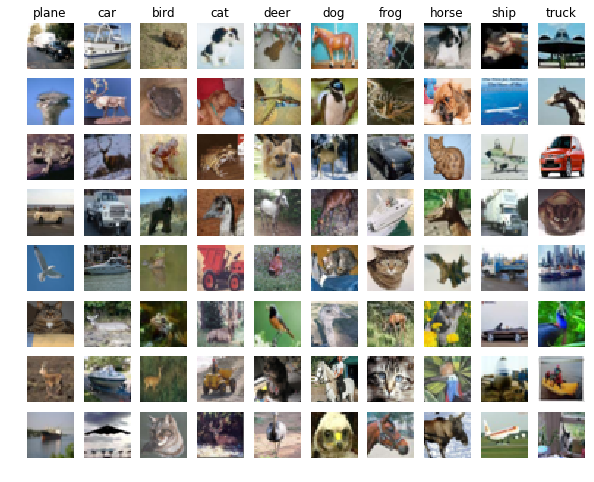

In [48]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [49]:
print(X_train_feats.shape)

(49000, 155)


In [61]:
input_dim = X_train_feats.shape[1]
hidden_dim = 1536
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################



#hidden_layer_size = [50, 80, 100]
learning_rates = 1.0000
reg = 0.00300
num_iters = 3000
batch_sizes = 200

results = {}



net.train(X_train_feats, y_train, X_val_feats, y_val
                ,learning_rate=learning_rates, learning_rate_decay=0.95
                ,reg=reg, num_iters=num_iters
                ,batch_size=batch_sizes, verbose=False)
valid_accuracy = np.mean(y_val == net.predict(X_val_feats))
           

/media/doniyor/Windows/Disk_D/MOOC/CS231n/Assignments/1(between 6-7)/assignment1/cs231n/classifiers/neural_net.py:100: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
/media/doniyor/Windows/Disk_D/MOOC/CS231n/Assignments/1(between 6-7)/assignment1/cs231n/classifiers/neural_net.py:101: RuntimeWarning: invalid value encountered in true_divide
  prob = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


In [58]:


input_dim = X_train_feats.shape[1]
hidden_dim = 500
num_classes = 10

net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
best_val = -1


#hidden_layer_size = [50, 80, 100]
learning_rates = [1e-5, 1.000000e-03, 1e-2]
regularization_strengths = [1.000000e-01, 2e-2, 1]
num_iters=[1500]
batch_sizes= [200]


results = {}


for lr_rate, reg, n_tr_epoch, batch_size in product(  learning_rates
                                                     ,regularization_strengths
                                                     ,num_iters
                                                     ,batch_sizes
                                                                    ):
    net.train(X_train_feats, y_train, X_val_feats, y_val
                    ,learning_rate=lr_rate, learning_rate_decay=0.95
                    ,reg=reg, num_iters=n_tr_epoch
                    ,batch_size=batch_size, verbose=False)
    valid_accuracy = np.mean(y_val == net.predict(X_val_feats))
    
    if valid_accuracy > best_val:
            best_val = valid_accuracy
            best_nnet = net
            #if it % 100 == 0:
            print('Parameters : %s Val  accuracy : %f' % ([hidden_dim,lr_rate, reg, n_tr_epoch, batch_size],best_val))
        
    results[(hidden_dim,lr_rate, reg, n_tr_epoch, batch_size)] = (valid_accuracy)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

Parameters : [500, 1e-05, 0.1, 1500, 200] Val  accuracy : 0.087000
Parameters : [500, 1e-05, 1, 1500, 200] Val  accuracy : 0.088000
Parameters : [500, 0.001, 0.1, 1500, 200] Val  accuracy : 0.106000


/media/doniyor/Windows/Disk_D/MOOC/CS231n/Assignments/1(between 6-7)/assignment1/cs231n/classifiers/neural_net.py:100: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
/media/doniyor/Windows/Disk_D/MOOC/CS231n/Assignments/1(between 6-7)/assignment1/cs231n/classifiers/neural_net.py:101: RuntimeWarning: invalid value encountered in true_divide
  prob = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


In [62]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print(test_acc)

0.103


# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!